# 실험 가.

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

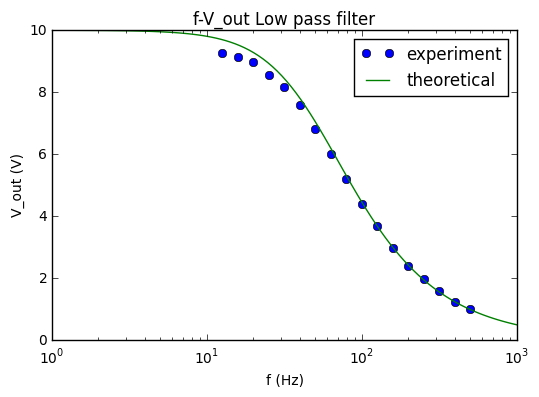

In [131]:
%matplotlib inline

freq = []
vout = []
Vin = 10.0
fc = 49.8

with open('low-pass.tsv', 'r') as f:
	while True:
		try:
			a, b = map(float, f.readline().split('\t'))
			freq.append(a)
			vout.append(b)
		except:
			break

freq = np.array(freq)
vout = np.array(vout)
x = np.logspace(0, 3, 100)
y = Vin / np.sqrt((x / fc)**2+1)

plt.title('f-V_out Low pass filter')
plt.xscale('log')
plt.xlabel('f (Hz)')
plt.ylabel('V_out (V)')
plt.xlim(1, 1000)
plt.ylim(0, 10)

plt.plot(freq, vout, 'o', label='experiment')
plt.plot(x, y, label='theoretical')
plt.legend(loc=0)
plt.savefig('low-pass.pdf')

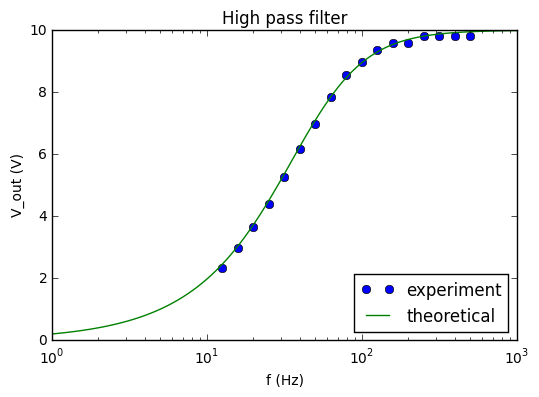

In [130]:
%matplotlib inline

freq = []
vout = []
Vin = 10.0
fc = 49.8

with open('high-pass.tsv', 'r') as f:
	while True:
		try:
			a, b = map(float, f.readline().split('\t'))
			freq.append(a)
			vout.append(b)
		except:
			break

freq = np.array(freq)
vout = np.array(vout)
x = np.logspace(0, 3, 100)
y = Vin * (x / fc) / np.sqrt((x / fc)**2+1)

plt.title('High pass filter')
plt.xlabel('f (Hz)')
plt.ylabel('V_out (V)')
plt.xscale('log')
plt.xlim(1, 1000)
plt.ylim(0, 10)

plt.plot(freq, vout, 'o', label='experiment')
plt.plot(x, y, label='theoretical')
plt.legend(loc=4)
plt.savefig('high-pass.pdf')

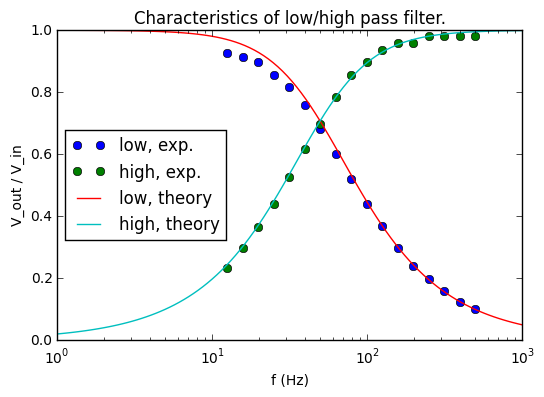

In [149]:
%matplotlib inline

freq_low = []
vout_low = []
freq_high = []
vout_high = []
Vin = 10.0
fc = 49.8

with open('low-pass.tsv', 'r') as f:
	while True:
		try:
			a, b = map(float, f.readline().split('\t'))
			freq_low.append(a)
			vout_low.append(b)
		except:
			break

with open('high-pass.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq_high.append(a)
            vout_high.append(b)
        except:
            break

freq_low = np.array(freq_low)
vout_low = np.array(vout_low) / Vin
freq_high = np.array(freq_high)
vout_high = np.array(vout_high) / Vin

x = np.logspace(0, 3, 100)
y_low = 1 / np.sqrt((x / fc)**2+1)
y_high = 1 * (x / fc) / np.sqrt((x / fc)**2+1)

plt.title('Characteristics of low/high pass filter.')
plt.xscale('log')
plt.xlabel('f (Hz)')
plt.ylabel('V_out / V_in')
plt.xlim(1, 1000)
plt.ylim(0, 1)
plt.plot(freq_low, vout_low, 'o', label='low, exp.')
plt.plot(freq_high, vout_high, 'o', label='high, exp.')
plt.plot(x, y_low, label='low, theory')
plt.plot(x, y_high, label='high, theory')
plt.legend(loc=6)
plt.savefig('lowhigh-pass.pdf')

y = (0.044923) + (0.881510) * x
r^2 = 0.978731


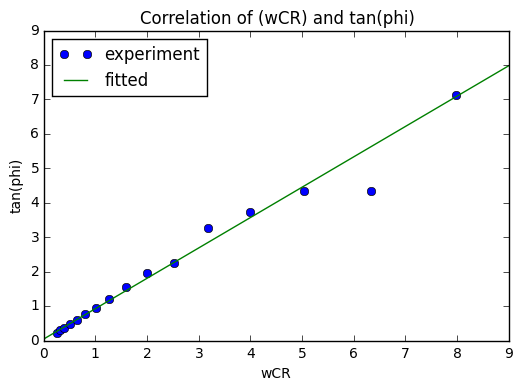

In [136]:
%matplotlib inline

freq = []
phase = []
R = 6.8e4
C = 4.7e-8

with open('low-pass-phase.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            phase.append(b)
        except:
            break

freq = (2*math.pi*R*C) * np.array(freq)
phase = np.tan(np.array(phase) / (180 / math.pi))

slope, intercept, r_value, p_value, std_err = stats.linregress(freq, phase)
print('y = (%f) + (%f) * x' % (intercept, slope))
print('r^2 = %f' % r_value**2)
x = np.linspace(0, 9, 100)
y = intercept + slope * x

plt.title('')
plt.title('Correlation of (wCR) and tan(phi)')
plt.xlabel('wCR')
plt.ylabel('tan(phi)')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.plot(freq, phase, 'o', label='experiment')
plt.plot(x, y, label='fitted')
plt.legend(loc=0)
plt.savefig('low-pass-phase.pdf')

y = (-1.625608) + (0.981565) * x
r^2 = 0.996691


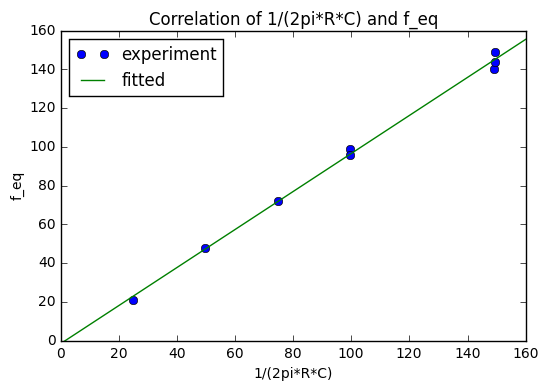

In [50]:
r = []
c = []
freq = []
with open('rc-feq.tsv', 'r') as f:
    while True:
        try:
            x, y, z = map(float, f.readline().split('\t'))
            r.append(x)
            c.append(y)
            freq.append(z)
        except:
            break

r = np.array(r)
c = np.array(c) * (1e-9)
rc = r*c
rcinv = 1/(2*math.pi*rc)
freq = np.array(freq)

slope, intercept, r_value, p_value, std_err = stats.linregress(rcinv, freq)
print('y = (%f) + (%f) * x' % (intercept, slope))
print('r^2 = %f' % r_value**2)
x = np.linspace(0, 160, 100)
y = intercept + slope * x

plt.title('Correlation of 1/(2pi*R*C) and f_eq')
plt.xlabel('1/(2pi*R*C)')
plt.ylabel('f_eq')
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.plot(rcinv, freq, 'o', label='experiment')
plt.plot(x, y, label='fitted')
plt.legend(loc=0)
plt.savefig('rc-feq.pdf')

# 실험 나.

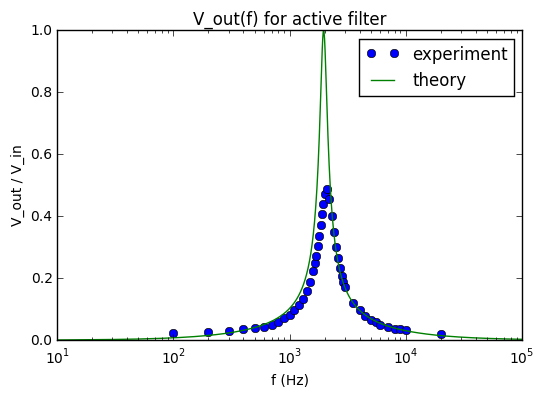

In [165]:
V0 = 10.0
R = 2.7e3
C = 200e-9
L = 32.8e-3

freq = []
vout = []

with open('active-filter.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            vout.append(b)
        except:
            break

freq = np.array(freq)
vout = np.array(vout) / V0

x = np.linspace(1, 100000, 10000)
omega = 2*math.pi*x
y = (omega / (R*C)) / np.sqrt( (1/(L*C) - omega**2)**2 + (omega / (R*C))**2 )

plt.xlabel('f (Hz)')
plt.ylabel('V_out / V_in')
plt.xscale('log')
plt.xlim(10, 100000)
plt.ylim(0, 1)
plt.title('V_out(f) for active filter')
plt.plot(freq, vout, 'o', label='experiment')
plt.plot(x, y, label='theory')
plt.legend(loc=0)
plt.savefig('active-filter.pdf')

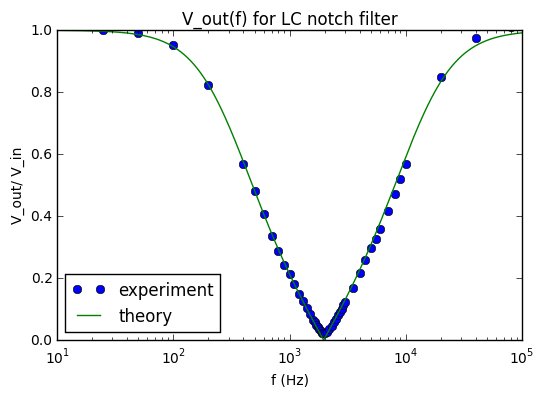

In [173]:
V0 = 10.0
R = 2.7e3
C = 200e-9
L = 32.8e-3

freq = []
vout = []

with open('notch-filter.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            vout.append(b)
        except:
            break

freq = np.array(freq)
vout = np.array(vout) / V0

x = np.logspace(1, 5, 1000)
omega = 2*math.pi*x
y = np.abs(1/(L*C) - omega**2) / np.sqrt((1/(L*C) - omega**2)**2 + (omega*R/L)**2)

plt.xlabel('f (Hz)')
plt.ylabel('V_out/ V_in')
plt.xlim(10, 100000)
plt.ylim(0, 1)
plt.xscale('log')
plt.title('V_out(f) for LC notch filter')
plt.plot(freq, vout, 'o', label='experiment')
plt.plot(x, y, label='theory')
plt.legend(loc=0)
plt.savefig('notch-filter.pdf')

# 실험 다.


y = (614.178523) + (0.813980) * x
r^2 = 0.978298


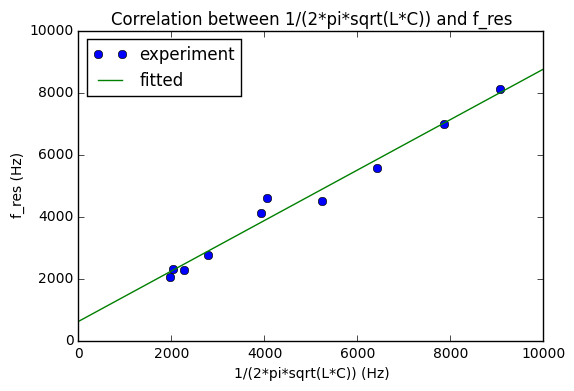

In [105]:
R = 300
l = []
c = []
fres = []

with open('rlc-resonance.tsv', 'r') as f:
    while True:
        try:
            x,y,z = map(float, f.readline().split('\t'))
            l.append(x)
            c.append(y)
            fres.append(z)
        except:
            break

l = np.array(l)
c = np.array(c)
lc = l*c
lcinv = 1 / (2*math.pi*np.sqrt(lc))

slope, intercept, r_value, p_value, std_err = stats.linregress(lcinv, fres)
print('y = (%f) + (%f) * x' % (intercept, slope))
print('r^2 = %f' % r_value**2)
x = np.linspace(0, 10000, 100)
y = intercept + slope * x

plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel('1/(2*pi*sqrt(L*C)) (Hz)')
plt.ylabel('f_res (Hz)')
plt.title('Correlation between 1/(2*pi*sqrt(L*C)) and f_res')
plt.plot(lcinv, fres, 'o', label='experiment')
plt.plot(x, y, label='fitted')
plt.legend(loc=0)
plt.savefig('rlc-resonance.pdf')

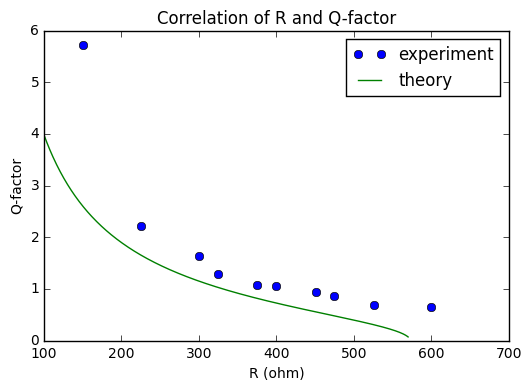

In [99]:
freq = []
qf = []

L = 32.8e-3
C = 200e-9

with open('qfactor.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            qf.append(b)
        except:
            break

freq = np.array(freq)
qf = np.array(qf)
x = np.linspace(100, 570, 600)
y = np.sqrt(1/(L*C) - (x/L)**2/2) / (x/L)

plt.plot(freq, qf, 'o', label='experiment')
plt.plot(x, y, label='theory')
plt.xlim(100, 700)
plt.ylim(0, 6)
plt.xlabel('R (ohm)')
plt.ylabel('Q-factor')
plt.title('Correlation of R and Q-factor')
plt.legend(loc=0)
plt.savefig('qfactor.pdf')

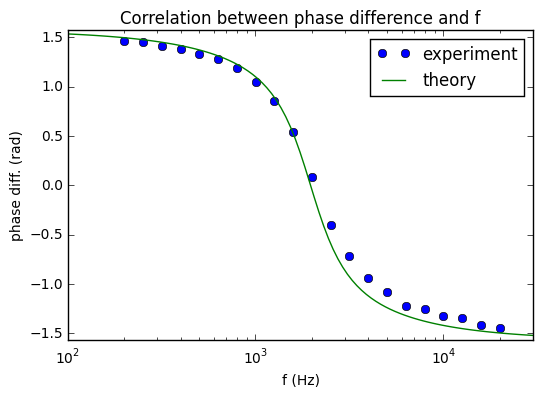

In [100]:
C = 200e-9
L = 32.8e-3
R = 300

freq = []
phi = []
with open('rlc-phase.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            phi.append(b)
        except:
            break

freq = np.array(freq)
phi = np.array(phi) * (math.pi / 180)

x = np.logspace(2, 4.5, 100)
y = np.arctan2(1/(L*C) - (2*math.pi*x)**2, 2*math.pi*R*x/L)
plt.xscale('log')
plt.xlim(100, 30000)
plt.ylim(-math.pi/2, math.pi/2)
plt.xlabel('f (Hz)')
plt.ylabel('phase diff. (rad)')
plt.title('Correlation between phase difference and f')
plt.plot(freq, phi, 'o', label='experiment')
plt.plot(x, y, label='theory')
plt.legend(loc=0)
plt.savefig('rlc-phase.pdf')

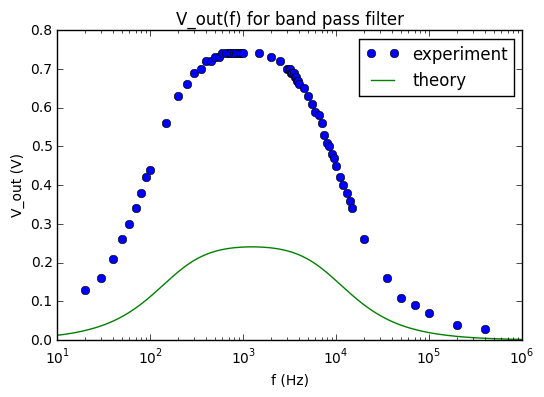

In [150]:
freq = []
vout = []
R1 = 2700
C1 = 300e-9
R2 = 200
C2 = 100e-9
Vin = 10

with open('band-pass.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            freq.append(a)
            vout.append(b)
        except:
            break

freq = np.array(freq)
vout = np.array(vout)
x = np.logspace(1, 6, 200)
y = Vin / (np.sqrt(1 + (2*math.pi*x*C1*R1)**2) * np.sqrt(1 + (1/(2*math.pi*x*C2*R2))**2))
plt.xscale('log')
plt.xlim(10, 10**6)
plt.ylim(0, 0.8)
plt.xlabel('f (Hz)')
plt.ylabel('V_out (V)')
plt.title('V_out(f) for band pass filter')
plt.plot(freq, vout, 'o', label='experiment')
plt.plot(x, y, label='theory')
plt.legend(loc=0)
plt.savefig('band-pass.pdf')